# **Business Data Science Project - Inside Airbnb (multi-city listings, reviews, calendars)**
### by Anastasia Bouev-Dombre, Arthur Morvan, Aliénor Sabourdin, Elise Deyris

# Objective: Smarter pricing (predict how price affects bookings)


*   Idea: If a night is too expensive, fewer people book; too cheap, you leave money on the table.
* What we build: A model that predicts, for each date, how likely a night is to be booked at a given price.
* Output: Recommended price per date (e.g., “15 July: price ≈ 120 for ≈ 80% booking probability”).

For the first part concerning **Data Collection & Cleaning**
We will:
- Load the three CSV files(listings, calendar, reviews), we decided to focus on the city of Bordeaux, France.
- Inspect their structure
- Handle missing values (especially prices and reviews)
- Normalize price and availability fields
- Perform basic geospatial cleaning (coordinates and neighbourhood mapping)
- Export cleaned datasets for later feature engineering and modeling.

In [1]:
#imports and paths
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

LISTINGS_PATH = "Data/Airbnb-Listings-Data.csv"
CALENDAR_PATH = "Data/Airbnb-Calendar-Data.csv"
REVIEWS_PATH = "Data/Airbnb-Reviews.csv"


In [2]:

listings_raw= pd.read_csv(LISTINGS_PATH)
calendar_raw= pd.read_csv(CALENDAR_PATH)
reviews_raw = pd.read_csv(REVIEWS_PATH)

print("Listings shape:", listings_raw.shape)
print("Calendar shape:", calendar_raw.shape)
print("Reviews shape:", reviews_raw.shape)


Listings shape: (12383, 79)
Calendar shape: (4519796, 7)
Reviews shape: (449626, 6)


In [3]:
#displaying csv files info
print("\nListings head:")
display(listings_raw.head())
print("\nCalendar head:")
display(calendar_raw.head())
print("\nReviews head:")
display(reviews_raw.head())
print("\nListings info:")
listings_raw.info()
print("\nCalendar info:")
calendar_raw.info()
print("\nReviews info:")
reviews_raw.info()


Listings head:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,222887,https://www.airbnb.com/rooms/222887,20250615022817,2025-06-26,city scrape,"Spectacular view, full air-con, elevator",Imagine yourself relaxing on a 12m² private te...,✔ NEARBY MARKETS – Located near St Michel anti...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,https://www.airbnb.com/users/show/1156398,Suzanne,2011-09-14,"Duras, France","Originally from New Zealand, I now divide my t...",within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Hôtel de Ville - Quinconces,25,31,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Shower gel"", ""Blender"", ""Waterfront"", ""Paid ...",$266.00,3,90,3.0,5.0,90.0,90.0,4.6,90.0,NaN,t,2,7,12,248,2025-06-26,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.90,4.96,4.75,4.69,3306300031048,t,4,4,0,0,0.77
1,247452,https://www.airbnb.com/rooms/247452,20250615022817,2025-06-26,city scrape,"Cosy apartment ,barbecue, pool",NaN,NaN,https://a0.muscache.com/pictures/39503733/4b3c...,959918,https://www.airbnb.com/users/show/959918,Krista,2011-08-12,"Bordeaux, France","Hi, I'm Krista, 53 years old, Belgian and livi...",within a day,67%,69%,f,https://a0.muscache.com/im/users/959918/profil...,https://a0.muscache.com/im/users/959918/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Saint-Mdard-en-Jalles,Saint-Mdard-en-Jalles,44.858900,-0.727350,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Private pool"", ""Heating"", ""Wine glasses"", ""W...",$115.00,3,30,3.0,3.0,30.0,30.0,3.0,30.0,NaN,t,24,34,57,147,2025-06-26,79,9,0,147,12,54,6210.0,2012-04-23,2025-04-03,4.73,4.75,4.69,4.96,4.88,4.55,4.61,NaN,f,1,1,0,0,0.49
2,317273,https://www.airbnb.com/rooms/317273,20250615022817,2025-06-26,city scrape,"Luxury, spacious, patio, near public gardens",Bordeaux City Gardens is a luxurious one-bedro...,✔ PRIME LOCATION – Situated near the Bordeaux ...,https://a0.muscache.com/pictures/miso/Hosting-...,1156398,https://www.airbnb.com/users/show/1156398,Suzanne,2011-09-14,"Duras, France","Originally from New Zealand, I now divide my t...",within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Hôtel de Ville - Quinconces,25,31,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Chartrons - Grand Parc - Jardin Public,Bordeaux,44.847801,-0.581046,Entire rental unit,Entire home/apt,3,1.5,1.5 baths,1.0,2.0,"[""Paid parking garage 


Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,222887,2025-06-26,f,NaN,NaN,3,90
1,222887,2025-06-27,f,NaN,NaN,3,90
2,222887,2025-06-28,f,NaN,NaN,3,90
3,222887,2025-06-29,t,NaN,NaN,3,90
4,222887,2025-06-30,f,NaN,NaN,5,90



Reviews head:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,222887,836020,2012-01-04,960075,Marjon,Suzanna's apartment is amazing and it was a tr...
1,222887,2717072,2012-10-25,2887504,Trevor,Great communication & directions from railway...
2,222887,2994458,2012-11-30,405763,William,Fabulous location over Bordeaux and manager ve...
3,222887,3561127,2013-02-17,169773,Daniel,Location is always a must for us and this plac...
4,222887,4230818,2013-04-21,4415172,Sue,This apartment is delightful. Thoughtfully an...



Listings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12383 non-null  int64  
 1   listing_url                                   12383 non-null  object 
 2   scrape_id                                     12383 non-null  int64  
 3   last_scraped                                  12383 non-null  object 
 4   source                                        12383 non-null  object 
 5   name                                          12383 non-null  object 
 6   description                                   12095 non-null  object 
 7   neighborhood_overview                         6032 non-null   object 
 8   picture_url                                   12383 non-null  object 
 9   host_id                                      

Remarks:

* Price formatting: In the listings dataset, the price column is stored as strings like "$266.00" and contains missing values. We will convert it to numeric format and handle the missing entries.

* Boolean fields:host_is_superhost, host_has_profile_pic, and instant_bookable appear as "t,f". We will transform them in proper boolean values

* Missing values in texts: neighborhood_overview, host_about, and description have many missing values,  We will decide whether to impute them or ignore them for modeling

* Missing numeric values:bedrooms, beds, and bathrooms contain missing values

* Dates stored as strings: last_scraped, host_since, first_review... will be converted to proper datetime objects

* Geospatial cleaning: Since latitude and longitude are complete, we will filter listings to keep only those located within the Bordeaux area.

## Cleaning Listings Data

- Load the CSV file
- Clean the price column
- Filter to Bordeaux city boundaries (geospatial)
- Parse date columns to datetime
- Convert boolean columns
- Clean percentage columns
- Handle amenities and host_verifications (count items)
- Parse bathrooms column (extract numeric)
- Impute missing important numeric, categorical, and text values
- Format ID columns as strings
- Create date features (month, day of week)
- Remove duplicate listings

In [4]:
import json
import re

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
listings = listings_raw.copy()

# Clean the price column
if "price" in listings.columns:
    listings["price"] = listings["price"].replace(r'[\$,]', '', regex=True).astype(float)
    listings["price"] = listings["price"].fillna(listings["price"].median())

# Filter to Bordeaux city boundaries
# Remove listings outside Bordeaux bounding box
def bordeaux_bound(df, lat_col="latitude", lon_col="longitude"):
    mask = (df[lat_col].between(44.792, 44.890)) & (df[lon_col].between(-0.620, -0.520))
    return df[mask]
if {"latitude", "longitude"} <= set(listings.columns):
    listings =bordeaux_bound(listings)

# data columns in datetime
date_cols = ["last_scraped", "host_since", "first_review","last_review"]
for col in date_cols:
    if col in listings.columns:
        listings[col] = pd.to_datetime(listings[col],errors="coerce")

# convert boolean columns
def map_tf_to_bool(series):
    return series.map({'t': True, 'f': False, 'True': True, 'False': False}).astype('boolean')

bool_cols = [
    "host_is_superhost", "host_has_profile_pic", "host_identity_verified",
    "has_availability", "instant_bookable"
]
for col in bool_cols:
    if col in listings.columns:
        listings[col] = map_tf_to_bool(listings[col])

def clean_percentage(series):
    return series.str.replace('%', '', regex=False).astype(float)
for col in ['host_response_rate', 'host_acceptance_rate']:
    if col in listings.columns:
        listings[col] = clean_percentage(listings[col])

# handle amenities and host_verifications (count items), parse bathroom column,s
def count_items(x):
    if pd.isna(x) or x in ['[]', '']:
        return 0
    try:
        items = json.loads(x.replace("'", '"'))
        return len(items)
    except:
        return x.count(',') + 1

for col in ["amenities", "host_verifications"]:
    if col in listings.columns:
        listings[col] = listings[col].fillna('[]')
        listings[f"{col}_count"] =listings[col].apply(count_items)

def parse_bathrooms(text):
    if pd.isna(text): return None
    t = str(text).lower()
    if 'half' in t: return 0.5
    m = re.search(r'(\d+(\.\d+)?)', t)
    if m: return float(m.group(1))
    return None

if "bathrooms_text" in listings.columns:
    listings["bathrooms_clean"] = listings["bathrooms_text"].apply(parse_bathrooms)
elif "bathrooms" in listings.columns:
    listings["bathrooms_clean"] = pd.to_numeric(listings["bathrooms"], errors="coerce")
    listings["bathrooms_clean"] = listings["bathrooms_clean"].fillna(listings["bathrooms_clean"].median())

# handle missing values
num_cols = ["price", "accommodates", "bedrooms", "beds", "bathrooms_clean"]
for col in num_cols:
    if col in listings.columns:
        listings[col] = listings[col].fillna(listings[col].median())
cat_cols = ["room_type", "property_type", "neighbourhood_cleansed"]
for col in cat_cols:
    if col in listings.columns:
        listings[col] = listings[col].fillna(listings[col].mode()[0])
for col in ["description", "neighborhood_overview", "host_about"]:
    if col in listings.columns:
        listings[col] = listings[col].fillna("")

# format ID columns as strings
for col in ["id", "scrape_id", "host_id"]:
    if col in listings.columns:
        listings[col] = listings[col].astype(str)

# create date features (month, day of week)
if "last_scraped" in listings.columns:
    listings["month"] = listings["last_scraped"].dt.month
    listings["day_of_week"] = listings["last_scraped"].dt.dayofweek

# remove duplicates
if "id" in listings.columns:
    listings = listings.drop_duplicates(subset="id", keep="first")

# remove irrelevant columns that can be confusing for our upcoming analysis
columns_to_remove = [
    # URLs and images aren't needed
    'listing_url', 'host_url', 'picture_url', 
    'host_thumbnail_url', 'host_picture_url',
    
    # text fields that are irrelevant
    'description', 'neighborhood_overview', 'host_about', 'name',
    
    # redundant columns (we have cleaned/aggregated versions)
    'bathrooms_text',  # we have bathrooms_clean
    'bathrooms',  # we have bathrooms_clean
    'amenities',  # we have amenities_count
    'host_verifications',  # we have host_verifications_count
    
    # metadata that is not needed
    'scrape_id', 'source', 'last_scraped',  
    'calendar_last_scraped', 'calendar_updated',
    
    # redundant date features (we'll create from calendar dates instead)
    'month', 'day_of_week',  # these are from last_scraped, not useful
    
    # redundant availability (we have calendar data for date-level availability)
    'has_availability',  # we have date-level availability in calendar
    
    # other redundant columns
    'host_listings_count',  # we have calculated_host_listings_count
    'host_total_listings_count',  # redundant with calculated_host_listings_count
    'neighbourhood',  # we have neighbourhood_cleansed
    'host_neighbourhood',  # not needed
]

# Remove columns that exist
cols_to_drop = [col for col in columns_to_remove if col in listings.columns]
listings = listings.drop(columns=cols_to_drop)

print("CLEAN SHAPE:", listings.shape)
print(f"Removed {len(cols_to_drop)} irrelevant columns")
print(f"Remaining columns: {listings.shape[1]}")
listings.head()

CLEAN SHAPE: (9061, 59)
Removed 25 irrelevant columns
Remaining columns: 59


,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities_count,host_verifications_count,bathrooms_clean
0,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.90,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0
2,317273,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Chartrons - Grand Parc - Jardin Public,Bordeaux,44.847801,-0.581046,Entire rental unit,Entire home/apt,3,1.0,2.0,203.0,3,90,3.0,3.0,90.0,90.0,3.0,90.0,2,11,28,273,80,20,0,100,19,120,24360.0,2014-08-13,2025-04-29,4.90,4.98,4.83,4.96,4.96,4.96,4.78,33063001366CB,True,4,4,0,0,0.60,40,3,1.5
3,317658,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Centre ville (Bordeaux),Bordeaux,44.838799,-0.568870,Entire rental unit,Entire home/apt,6,2.0,4.0,222.0,3,90,2.0,5.0,90.0,90.0,4.5,90.0,11,17,27,269,161,17,0,93,21,102,22644.0,2012-03-15,2025-04-28,4.87,4.85,4.83,4.88,4.92,4.97,4.77,33063001225CF,True,4,4,0,0,1.00,48,3,1.0
4,333031,1697156,Antony,2012-02-04,"Bordeaux, France",within an hour,86.0,82.0,True,True,True,Centre ville (Bordeaux),Bordeaux,44.842560,-0.577940,Entire rental unit,Entire home/apt,2,0.0,1.0,103.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,24,54,82,353,556,53,4,178,47,255,26265.0,2012-04-02,2025-06-09,4.92,4.95,4.95,4.95,4.92,4.98,4.83,3306300055979,False,2,1,1,0,3.45,24,3,1.0
5,365993,1847986,Damien,2012-03-03,"Bordeaux, France",within a few hours,100.0,91.0,True,True,True,Bgles,Bgles,44.811490,-0.558250,Entire rental unit,Entire home/apt,6,2.0,3.0,77.0,5,30,5.0,5.0,30.0,30.0,5.0,30.0,7,20,34,221,72,9,2,45,6,90,6930.0,2012-05-27,2025-06-13,4.90,4.93,4.99,4.93,4.94,4.71,4.74,NaN,False,2,2,0,0,0.45,59,1,1.0


## Cleaning Calendar Data

The calendar data is critical for booking prediction as it contains:
- Date-level availability (available/booked labels)
- Price per date
- Minimum/maximum nights requirements

We will:
- Filter to Bordeaux listings (join with cleaned listings)
- Parse date column to datetime
- Convert available column to boolean
- Handle missing prices (use listing's base price or median)
- Create booking label (booked = not available)
- Remove invalid dates


In [5]:
# --- Load calendar data ---

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
calendar = calendar_raw.copy()

print("Calendar raw shape:", calendar.shape)
print("\nCalendar columns:", calendar.columns.tolist())
print("\nCalendar dtypes:")
print(calendar.dtypes)
print("\nCalendar head:")
display(calendar.head())
print("\nMissing values:")
print(calendar.isnull().sum())
print("\nAvailable values unique:", calendar['available'].unique() if 'available' in calendar.columns else "N/A")


Calendar raw shape: (4519796, 7)

Calendar columns: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

Calendar dtypes:
listing_id          int64
date               object
available          object
price             float64
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object

Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,222887,2025-06-26,f,NaN,NaN,3,90
1,222887,2025-06-27,f,NaN,NaN,3,90
2,222887,2025-06-28,f,NaN,NaN,3,90
3,222887,2025-06-29,t,NaN,NaN,3,90
4,222887,2025-06-30,f,NaN,NaN,5,90



Missing values:
listing_id              0
date                    0
available               0
price             4519796
adjusted_price    4519796
minimum_nights          0
maximum_nights          0
dtype: int64

Available values unique: ['f' 't']


In [6]:
# clean calandar data

# filter to Bordeaux listings only
calendar['listing_id'] = calendar['listing_id'].astype(str)
bordeaux_listing_ids = set(listings['id'].astype(str))
calendar = calendar[calendar['listing_id'].isin(bordeaux_listing_ids)].copy()

# parse date and convert available to boolean
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
calendar = calendar[calendar['date'].notna()].copy()

calendar['available'] = calendar['available'].map({'t': True, 'f': False, 'True': True, 'False': False, True: True, False: False})
calendar['available'] = calendar['available'].astype('boolean')
calendar['is_booked'] = ~calendar['available']  # booked = not available

# handle prices - chain: adjusted_price -> price -> listing price -> median
listings_price_map = listings.set_index('id')['price'].to_dict()
calendar['listing_base_price'] = calendar['listing_id'].map(listings_price_map)

# create price_clean using fillna chain
if 'adjusted_price' in calendar.columns and 'price' in calendar.columns:
    calendar['price_clean'] = calendar['adjusted_price'].fillna(calendar['price']).fillna(calendar['listing_base_price'])
elif 'adjusted_price' in calendar.columns:
    calendar['price_clean'] = calendar['adjusted_price'].fillna(calendar['listing_base_price'])
elif 'price' in calendar.columns:
    calendar['price_clean'] = calendar['price'].fillna(calendar['listing_base_price'])
else:
    calendar['price_clean'] = calendar['listing_base_price']

# fill remaining missing with median
if calendar['price_clean'].notna().sum() > 0:
    calendar['price_clean'] = calendar['price_clean'].fillna(calendar['price_clean'].median())

# remove rows with missing prices
calendar = calendar[calendar['price_clean'].notna()].copy()

#clean up
calendar = calendar.dropna(subset=['listing_id', 'date', 'available'])
calendar = calendar.sort_values(['listing_id', 'date']).reset_index(drop=True)

#remove redundant columns
cols_to_remove =['price', 'adjusted_price', 'listing_base_price']
cols_to_remove = [col for col in cols_to_remove if col in calendar.columns]
calendar = calendar.drop(columns=cols_to_remove)

#display results
print(f"Final calendar shape: {calendar.shape}")
print(f"Date range: {calendar['date'].min()} to {calendar['date'].max()}")
print(f"Booking rate: {calendar['is_booked'].mean():.2%}")
print(f"Price range: {calendar['price_clean'].min():.2f} - {calendar['price_clean'].max():.2f}")
calendar.head(30)


Final calendar shape: (3307266, 7)
Date range: 2025-06-25 00:00:00 to 2026-06-26 00:00:00
Booking rate: 63.26%
Price range: 12.00 - 10000.00


,listing_id,date,available,minimum_nights,maximum_nights,is_booked,price_clean
0,1000537871351948755,2025-06-26,False,1,365,True,76.0
1,1000537871351948755,2025-06-27,False,1,365,True,76.0
2,1000537871351948755,2025-06-28,False,1,365,True,76.0
3,1000537871351948755,2025-06-29,True,1,365,False,76.0
4,1000537871351948755,2025-06-30,True,1,365,False,76.0
5,1000537871351948755,2025-07-01,False,1,365,True,76.0
6,1000537871351948755,2025-07-02,True,1,365,False,76.0
7,1000537871351948755,2025-07-03,True,1,365,False,76.0
8,1000537871351948755,2025-07-04,True,1,365,False,76.0
9,1000537871351948755,2025-07-05,True,1,365,False,76.0


# Clean Reviews Data

We will:
- Filter to Bordeaux listings 
- Parse date column to datetime
- Handle missing prices 
- Sort by listing_id and date
- Remove irrelevant columns


In [7]:
# --- Load reviews data ---

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! petite modif ici puisquón avait déjà load le dataset !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
reviews = reviews_raw.copy()
# reviews = pd.read_csv(REVIEWS_PATH)

print("Reviews raw shape:", reviews.shape)
print("\nReviews columns:", reviews.columns.tolist())
print("\nReviews dtypes:")
print(reviews.dtypes)
print("\nMissing values:")
print(reviews.isnull().sum())
print("\nReviews head:")
display(reviews.head())


Reviews raw shape: (449626, 6)

Reviews columns: ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

Reviews dtypes:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

Missing values:
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         9
dtype: int64

Reviews head:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,222887,836020,2012-01-04,960075,Marjon,Suzanna's apartment is amazing and it was a tr...
1,222887,2717072,2012-10-25,2887504,Trevor,Great communication & directions from railway...
2,222887,2994458,2012-11-30,405763,William,Fabulous location over Bordeaux and manager ve...
3,222887,3561127,2013-02-17,169773,Daniel,Location is always a must for us and this plac...
4,222887,4230818,2013-04-21,4415172,Sue,This apartment is delightful. Thoughtfully an...


In [8]:
# --- Clean Reviews Data ---

# filter to Bordeaux listings only
reviews['listing_id'] = reviews['listing_id'].astype(str)
reviews = reviews[reviews['listing_id'].isin(bordeaux_listing_ids)].copy()

print(f"Reviews after filtering to Bordeaux: {reviews.shape}")

# parse date column to datetime
if 'date' in reviews.columns:
    reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
    # Remove rows with invalid dates
    reviews = reviews[reviews['date'].notna()].copy()

# handle missing comments (fill with empty string for now, can be used for sentiment analysis later)
if 'comments' in reviews.columns:
    reviews['comments'] = reviews['comments'].fillna('')


# remove any remaining invalid rows
reviews = reviews.dropna(subset=['listing_id', 'date'])

# sort by listing_id and date
reviews = reviews.sort_values(['listing_id', 'date']).reset_index(drop=True)

# remove irrelevant columns
columns_to_remove_reviews = [
    'reviewer_name',  # not needed for modeling
    'reviewer_id',  # not needed unless analyzing reviewer behavior
    'id',  # review ID not needed (we have listing_id and date)
]

cols_to_drop_rev = [col for col in columns_to_remove_reviews if col in reviews.columns]
reviews = reviews.drop(columns=cols_to_drop_rev)

print(f"\nFinal reviews shape: {reviews.shape}")
print(f"Removed {len(cols_to_drop_rev)} irrelevant columns")
print(f"\nDate range:{reviews['date'].min()} to {reviews['date'].max()}")
print(f"\nReviews with comments: {(reviews['comments'].str.strip() != '').sum()}")
print(f"\nSample of cleaned reviews:")
reviews.head(10)


Reviews after filtering to Bordeaux: (351940, 6)

Final reviews shape: (351940, 3)
Removed 3 irrelevant columns

Date range:2012-01-04 00:00:00 to 2025-06-26 00:00:00

Reviews with comments: 351933

Sample of cleaned reviews:


,listing_id,date,comments
0,1000537871351948755,2023-11-19,Tout s’est très bien passé ! Appartement très ...
1,1000537871351948755,2023-11-26,Ha sido un placer alojarnos con Camille.<br/>H...
2,1000537871351948755,2023-12-10,Je remercie Camille pour son accueil dans l'ap...
3,1000537871351948755,2023-12-15,J'ai passé un court mais excellent sejour chez...
4,1000537871351948755,2024-02-04,Hôte disponible <br/>Logement très accueillant...
5,1000537871351948755,2024-02-18,"Hôte très accueillante , très disponible , log..."
6,1000537871351948755,2024-03-19,"Airbnb, parfait, j’y retournerai sans hésiter !"
7,1000537871351948755,2024-04-02,Merci à Camille pour ce séjour fabuleux ! Le l...
8,1000537871351948755,2024-04-28,"Nous avons passé deux nuits à l'échoppe, l'env..."
9,1000537871351948755,2024-05-06,"Super séjour à l’échoppe, très spacieux et bie..."


In [9]:
# Summuary of Cleaned Datasets


print(f"LISTINGS:")
print(f"Shape: {listings.shape}")
print(f"   Key columns: id, host_id, price, room_type, property_type,")
print(f"                accommodates, bedrooms, beds, bathrooms_clean,")
print(f"                amenities_count, neighbourhood_cleansed, latitude, longitude,")
print(f"                review_scores_*, host_metrics,...")

print("\n")
print(f"CALENDAR:")
print(f"   Shape: {calendar.shape}")
print(f"   Key columns: listing_id, date, available, is_booked, price_clean,")
print(f"                minimum_nights, maximum_nights")

print("\n")
print(f"REVIEWS:")
print(f"   Shape: {reviews.shape}")
print(f"   Key columns: listing_id, date, comments")



LISTINGS:
Shape: (9061, 59)
   Key columns: id, host_id, price, room_type, property_type,
                accommodates, bedrooms, beds, bathrooms_clean,
                amenities_count, neighbourhood_cleansed, latitude, longitude,
                review_scores_*, host_metrics,...


CALENDAR:
   Shape: (3307266, 7)
   Key columns: listing_id, date, available, is_booked, price_clean,
                minimum_nights, maximum_nights


REVIEWS:
   Shape: (351940, 3)
   Key columns: listing_id, date, comments


## Summary of Data Cleaning

**Listings Data**: Cleaned and filtered to Bordeaux 
- Price normalized, dates parsed, booleans converted, missing values handled, duplicates removed

**Calendar Data**: Cleaned and filtered to Bordeaux listings, 
- Date level availability and prices ready for booking prediction, booking labels created (is_booked = not available), missing prices handled

**Reviews Data**: Cleaned and filtered to Bordeaux listings
- Ready for review-based feature engineering

# Next Step : Feature Engineering and Modeling !


### Overview

We want to merge the datasets. We need the listings to correspond to the calendar dates. 

Here are the columns that we have in the listings and in the calendar datasets:

In [10]:
# compare columns of the three datasets
print("Listings columns:", set(listings.columns))
print("Calendar columns:", set(calendar.columns))
print("Reviews columns:", set(reviews.columns))

Listings columns: {'amenities_count', 'host_name', 'latitude', 'first_review', 'review_scores_cleanliness', 'host_identity_verified', 'host_has_profile_pic', 'bathrooms_clean', 'property_type', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'host_response_time', 'host_since', 'longitude', 'calculated_host_listings_count', 'host_is_superhost', 'reviews_per_month', 'review_scores_checkin', 'calculated_host_listings_count_shared_rooms', 'availability_60', 'minimum_maximum_nights', 'minimum_nights', 'host_verifications_count', 'calculated_host_listings_count_private_rooms', 'review_scores_accuracy', 'host_location', 'accommodates', 'host_response_rate', 'license', 'availability_90', 'availability_eoy', 'number_of_reviews_ltm', 'minimum_minimum_nights', 'neighbourhood_group_cleansed', 'number_of_reviews', 'host_acceptance_rate', 'maximum_nights', 'minimum_nights_avg_ntm', 'last_review', 'availability_365', 'number_of_reviews_ly', 'maximum_nights_avg_ntm', 'availability

To get an idea of how we are going to perform the merge, let's see how listings are represented in the different datasets:

In [11]:
# get the rows in each dataset where "id" or "listing_id" is equal to '1605871'
print("\nListings row for id '1605871':")
display(listings[listings['id'] == '1605871'])
print("\nCalendar rows for listing_id '1605871':")
display(calendar[calendar['listing_id'] == '1605871'])
print("\nReviews rows for listing_id '1605871':")
display(reviews[reviews['listing_id'] == '1605871'])


Listings row for id '1605871':


,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities_count,host_verifications_count,bathrooms_clean
88,1605871,8555286,Ghislaine,2013-08-31,"Bordeaux, France",NaN,NaN,NaN,False,True,False,Saint Augustin - Tauzin - Alphonse Dupeux,Bordeaux,44.8203,-0.60063,Entire condo,Entire home/apt,3,1.0,2.0,47.0,3,28,3.0,14.0,1125.0,1125.0,3.4,1125.0,4,25,54,54,124,0,0,54,0,0,0.0,2014-09-04,2021-11-15,4.67,4.8,4.73,4.87,4.89,4.48,4.65,33063000435E3,False,1,1,0,0,0.94,21,2,1.0



Calendar rows for listing_id '1605871':


,listing_id,date,available,minimum_nights,maximum_nights,is_booked,price_clean
1168365,1605871,2025-06-25,False,3,1125,True,47.0
1168366,1605871,2025-06-26,False,3,1125,True,47.0
1168367,1605871,2025-06-27,False,3,1125,True,47.0
1168368,1605871,2025-06-28,False,3,1125,True,47.0
1168369,1605871,2025-06-29,False,3,1125,True,47.0
...,...,...,...,...,...,...,...
1168725,1605871,2026-06-20,False,3,1125,True,47.0
1168726,1605871,2026-06-21,False,3,1125,True,47.0
1168727,1605871,2026-06-22,False,3,1125,True,47.0
1168728,1605871,2026-06-23,False,3,1125,True,47.0



Reviews rows for listing_id '1605871':


,listing_id,date,comments
68101,1605871,2014-09-04,Lovely apartment. Close to bus line which take...
68102,1605871,2014-09-06,Lovely clean apartment. Well equipped with eve...
68103,1605871,2015-04-30,Très bon accueil. Ghislaine est toujours dispo...
68104,1605871,2015-05-10,Nous avons loué cet appartement pour 2 nuits ;...
68105,1605871,2015-05-17,"Appartement très agréable, propre et calme\r<b..."
...,...,...,...
68220,1605871,2020-02-24,L'appartement dans un ensemble d'immeubles dan...
68221,1605871,2020-03-01,Parfaitement conforme aux attentes. Je recomma...
68222,1605871,2021-11-02,L’appartement était un peu éloigné du centre v...
68223,1605871,2021-11-09,Emplacement parfait pour notre séjour dans cet...


### Merging

listings:
- We have one listing ID (column "id") per row in the listings dataset. "id" serves here as a primary key.

calendar:
-  We have 365 times the same "listing_id" in the dataset. This is because the dataset actually has one row for each day of the year for a certain apartment. The primary key in this table is a composite key made up of "listing_id" and "date".

We will therefore perform a left join from the listings dataset to the calendar dataset, in order to still have the availability of a certain listing for each fay of the year. 

In [12]:
# Perform the left join

merged_df = listings.merge(
    calendar,
    left_on='id',           # Column in listings_df
    right_on='listing_id',  # Column in calendar_df
    how='left'              # Left join
)

print("Calendar shape:", calendar.shape)
print("Listings shape:", listings.shape)
print("Merged DataFrame shape:", merged_df.shape)

Calendar shape: (3307266, 7)
Listings shape: (9061, 59)
Merged DataFrame shape: (3307266, 66)


Merged dataframe:
- So the number of columns is equal to the sum of the number of columns in both datasets. 
- The number of rows is equal to the number of rows in the calendar dataframe.

### Feature Engineering

Keeping all these features is useless in order to achieve our bigger goal of predicting:
1. the price of a listing per night, according to all of the features
2. whether an aprtment is probably booked or not, according to the price of the listing

Indeed, col

In [13]:
# creating a copy of merged_df we might refer to later, to check geographical coordinatates fro instance.
merged_df_clean_copy = merged_df.copy()

In [14]:
# lsiting all the columns in the merged dataframe
print("Merged DataFrame columns:", merged_df.columns.tolist())

Merged DataFrame columns: ['id', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights_x', 'maximum_nights_x', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'rev

In [15]:
merged_df.head()

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities_count,host_verifications_count,bathrooms_clean,listing_id,date,available,minimum_nights_y,maximum_nights_y,is_booked,price_clean
0,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.9,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0,222887,2025-06-26,False,3,90,True,266.0
1,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.9,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0,222887,2025-06-27,False,3,90,True,266.0
2,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.9,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0,222887,2025-06-28,False,3,90,True,266.0
3,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.9,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0,222887,2025-06-29,True,3,90,False,266.0
4,222887,1156398,Suzanne,2011-09-14,"Duras, France",within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,44.836102,-0.566395,Entire vacation home,Entire home/apt,4,2.0,3.0,266.0,3,90,3.0,5.0,90.0,90.0,4.6,90.0,2,7,12,248,127,31,5,77,28,186,49476.0,2012-01-04,2025-06-22,4.83,4.83,4.75,4.9,4.96,4.75,4.69,3306300031048,True,4,4,0,0,0.77,56,3,1.0,222887,2025-06-30,False,5,90,True,266.0


In [16]:
# dropping columns "listing_id" as it is redundant with "id"
merged_df = merged_df.drop(columns=['listing_id'])

# dropping columns "minimum_nights_y" and "maximum_nights_y" as they are redundant with "minimum_nights_x" and "maximum_nights_x"
merged_df = merged_df.drop(columns=['minimum_nights_y', 'maximum_nights_y'])
# renaming columns to have consistent names
merged_df = merged_df.rename(columns={'minimum_nights_x': 'minimum_nights', 'maximum_nights_x': 'maximum_nights'})

In [17]:
# drop "host_id", "host_name" and "host_location" as they are not relevant for our analysis
merged_df = merged_df.drop(columns=['host_id', 'host_name', 'host_location'])

In [18]:
# Only keep the year for "host since", we assume the day and the month are not relevant for our analysis

merged_df['host_since_year'] = merged_df['host_since'].dt.year
merged_df = merged_df.drop(columns=['host_since'])

In [19]:
# Only keep the year for "last_review" and "first_review", we assume the day and the month are not relevant for our analysis

merged_df['first_review_year'] = merged_df['first_review'].dt.year
merged_df = merged_df.drop(columns=['first_review'])

merged_df['last_review_year'] = merged_df['last_review'].dt.year
merged_df = merged_df.drop(columns=['last_review'])

In [20]:
# dropping latitude and longitude columns as we won't use them for our analysis
# we will rather refer to the neighborhood.

merged_df = merged_df.drop(columns=['latitude', 'longitude'])

In [21]:
# dropping "license" column as it is not relevant for our analysis

merged_df = merged_df.drop(columns=['license'])

In [22]:
# room_type column is more relevant than property_type for our analysis, so we drop property_type
merged_df = merged_df.drop(columns=['property_type'])

In [23]:
# print unique values in each column
for col in merged_df.columns:
    unique_values = merged_df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values.")

Column 'id' has 9061 unique values.
Column 'host_response_time' has 4 unique values.
Column 'host_response_rate' has 60 unique values.
Column 'host_acceptance_rate' has 98 unique values.
Column 'host_is_superhost' has 2 unique values.
Column 'host_has_profile_pic' has 2 unique values.
Column 'host_identity_verified' has 2 unique values.
Column 'neighbourhood_cleansed' has 25 unique values.
Column 'neighbourhood_group_cleansed' has 12 unique values.
Column 'room_type' has 4 unique values.
Column 'accommodates' has 16 unique values.
Column 'bedrooms' has 10 unique values.
Column 'beds' has 14 unique values.
Column 'price' has 429 unique values.
Column 'minimum_nights' has 42 unique values.
Column 'maximum_nights' has 114 unique values.
Column 'minimum_minimum_nights' has 40 unique values.
Column 'maximum_minimum_nights' has 46 unique values.
Column 'minimum_maximum_nights' has 114 unique values.
Column 'maximum_maximum_nights' has 114 unique values.
Column 'minimum_nights_avg_ntm' has 13

### Encoding

Encoding certain values will help us 

In [24]:
df_encoded = merged_df.copy()

In [25]:
# encode categorical variables for better visualization

categorical_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                       'instant_bookable', 'bathrooms_clean', 'available', 'is_booked', 'host_response_time', 'room_type']

numerical_columns = ['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                     'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 
                     'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                     'calculated_host_listings_count_shared_rooms', 'amenities_count', 'host_verifications_count', 'first_review_year', 
                     'last_review_year', 'host_since_year', 'price_clean', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 
                     'number_of_reviews_ly', 'availability_eoy', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'host_acceptance_rate', 'reviews_per_month', 'maximum_minimum_nights', 'minimum_minimum_nights', 
                     'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 
                     'number_of_reviews_l30d', 'minimum_maximum_nights', 'number_of_reviews', 'host_response_rate', 'bathrooms_clean']

In [26]:
# check the data types of the columns in the categorical and numerical columns
print("Categorical columns data types:")
print(df_encoded[categorical_columns].dtypes)
print("\nNumerical columns data types:")
print(df_encoded[numerical_columns].dtypes)

Categorical columns data types:
host_is_superhost               boolean
host_has_profile_pic            boolean
host_identity_verified          boolean
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
instant_bookable                boolean
bathrooms_clean                 float64
available                       boolean
is_booked                       boolean
host_response_time               object
room_type                        object
dtype: object

Numerical columns data types:
price                                           float64
accommodates                                      int64
bedrooms                                        float64
beds                                            float64
minimum_nights                                    int64
maximum_nights                                    int64
review_scores_rating                            float64
review_scores_accuracy                          float64
review_scores_cleanliness          

In [27]:
# check for columns in df_encoded that are not in categorical_columns or numerical_columns
other_columns = set(df_encoded.columns) - set(categorical_columns) - set(numerical_columns)
print("Other columns in df_encoded:", other_columns)

Other columns in df_encoded: {'id', 'date'}


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

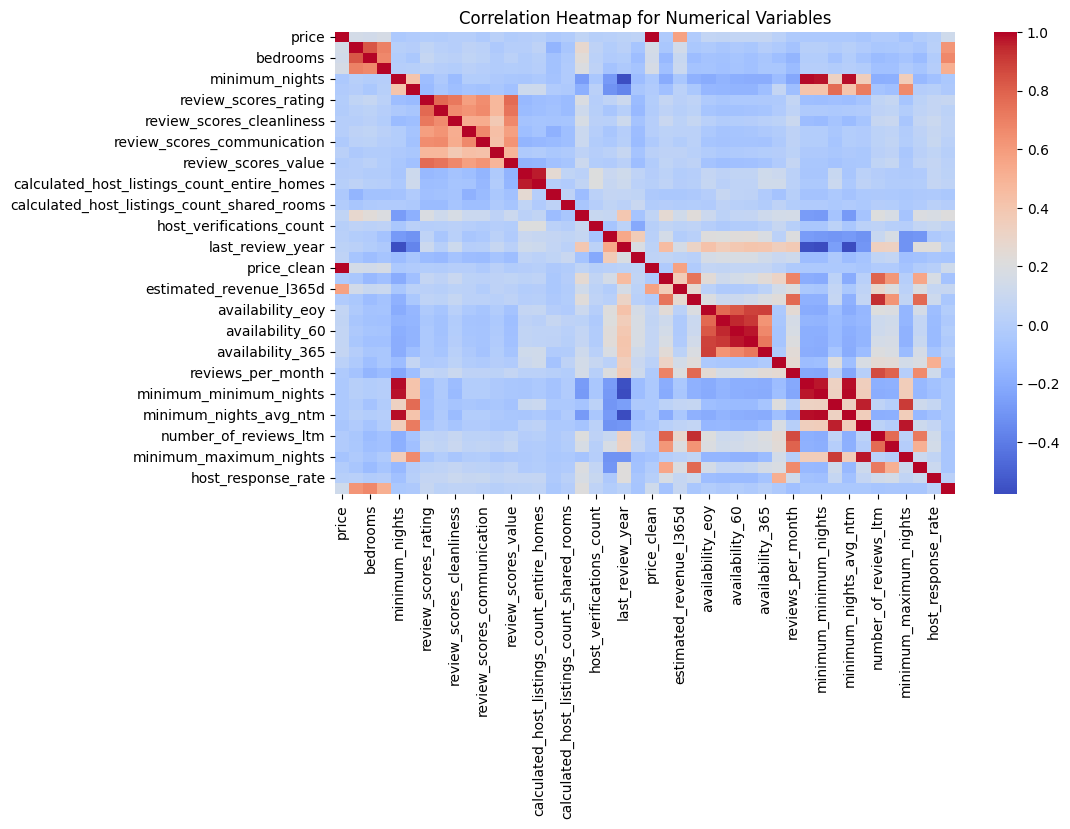

In [29]:
# plotting correlation heatmap for numerical variables

plt.figure(figsize=(10, 6))
corr = df_encoded[numerical_columns].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [30]:
# this heatmap is a bit cluttered, we can extract the high correlation pairs directly for better clarity

def get_high_correlation_pairs(corr_matrix, threshold=0.7):
    pairs = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_matrix.iloc[i, j]
            if abs(val) >= threshold:
                pairs.append((cols[i], cols[j], val))
    return pd.DataFrame(pairs, columns=['Var1', 'Var2', 'Correlation'])

high_corr_pairs = get_high_correlation_pairs(corr, threshold=0.7)
print(high_corr_pairs)

                              Var1                                         Var2  Correlation
0                            price                                  price_clean     1.000000
1                     accommodates                                     bedrooms     0.829533
2                   minimum_nights                       maximum_minimum_nights     0.988634
3                   minimum_nights                       minimum_minimum_nights     0.979649
4                   minimum_nights                       minimum_nights_avg_ntm     0.984154
5                   maximum_nights                       maximum_maximum_nights     0.768064
6                   maximum_nights                       maximum_nights_avg_ntm     0.713710
7             review_scores_rating                       review_scores_accuracy     0.776228
8             review_scores_rating                    review_scores_cleanliness     0.725979
9             review_scores_rating                          review_sco

### Drop columns with high multicollinearity, only keep one of those

In [31]:
# drop 'available' because it has a correlation of -1 with 'is_booked'
df_encoded = df_encoded.drop(columns=['available'])

In [32]:
# drop 
df_encoded = df_encoded.drop(columns=['maximum_minimum_nights'])
df_encoded = df_encoded.drop(columns=['minimum_minimum_nights'])
df_encoded = df_encoded.drop(columns=['maximum_maximum_nights'])
df_encoded = df_encoded.drop(columns=['minimum_maximum_nights'])

In [33]:
df_encoded = df_encoded.drop(columns=['minimum_nights_avg_ntm'])
df_encoded = df_encoded.drop(columns=['maximum_nights_avg_ntm'])

In [34]:
df_encoded = df_encoded.drop(columns=['availability_eoy'])
df_encoded = df_encoded.drop(columns=['availability_60'])
df_encoded = df_encoded.drop(columns=['availability_90'])
df_encoded = df_encoded.drop(columns=['availability_365'])

In [35]:
df_encoded = df_encoded.drop(columns=['review_scores_accuracy'])
df_encoded = df_encoded.drop(columns=['review_scores_cleanliness'])
df_encoded = df_encoded.drop(columns=['review_scores_value'])

In [36]:
df_encoded = df_encoded.drop(columns=['calculated_host_listings_count_entire_homes'])

In [37]:
df_encoded = df_encoded.drop(columns=['reviews_per_month'])
df_encoded = df_encoded.drop(columns=['number_of_reviews_ltm'])
df_encoded = df_encoded.drop(columns=['number_of_reviews'])

In [38]:
# drop because it is highly correlated with the number of reviews during the past year
df_encoded = df_encoded.drop(columns=['estimated_occupancy_l365d'])


In [39]:
# drop because it is highly correlated with the number of bedrooms
df_encoded = df_encoded.drop(columns=['accommodates'])

In [40]:
# drop the id because it is related to first review year
df_encoded = df_encoded.drop(columns=['id'])

In [41]:
# drop price
df_encoded = df_encoded.drop(columns=['price'])

In [42]:
df_encoded.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'availability_30', 'number_of_reviews_l30d', 'number_of_reviews_ly',
       'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
       'amenities_count', 'host_verifications_count', 'bathrooms_clean', 'date', 'is_booked', 'price_clean',
       'host_since_year', 'first_review_year', 'last_review_year'],
      dtype='object')

In [43]:
new_numerical_columns = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30',
       'number_of_reviews_l30d', 'number_of_reviews_ly', 'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'instant_bookable',
       'calculated_host_listings_count', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'amenities_count', 'host_verifications_count', 'bathrooms_clean',
       'date', 'is_booked', 'price_clean', 'host_since_year', 'first_review_year', 'last_review_year']

corr = df_encoded[new_numerical_columns].corr()
high_corr_pairs = get_high_correlation_pairs(corr, threshold=0.7)
print(high_corr_pairs)

Empty DataFrame
Columns: [Var1, Var2, Correlation]
Index: []


### Further checking multi-colinearity by looking at Variance Inflation Factor

To be able to look at Variance Inflation Factor on the dataset, we will create dummy variables for all the encoded variables.

In [44]:
df_encoded.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,bedrooms,beds,minimum_nights,maximum_nights,availability_30,number_of_reviews_l30d,number_of_reviews_ly,estimated_revenue_l365d,review_scores_rating,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,amenities_count,host_verifications_count,bathrooms_clean,date,is_booked,price_clean,host_since_year,first_review_year,last_review_year
0,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire home/apt,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.9,4.96,4.75,True,4,0,0,56,3,1.0,2025-06-26,True,266.0,2011,2012.0,2025.0
1,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire home/apt,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.9,4.96,4.75,True,4,0,0,56,3,1.0,2025-06-27,True,266.0,2011,2012.0,2025.0
2,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire home/apt,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.9,4.96,4.75,True,4,0,0,56,3,1.0,2025-06-28,True,266.0,2011,2012.0,2025.0
3,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire home/apt,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.9,4.96,4.75,True,4,0,0,56,3,1.0,2025-06-29,False,266.0,2011,2012.0,2025.0
4,within an hour,100.0,94.0,True,True,True,Bordeaux Sud,Bordeaux,Entire home/apt,2.0,3.0,3,90,2,5,28,49476.0,4.83,4.9,4.96,4.75,True,4,0,0,56,3,1.0,2025-06-30,True,266.0,2011,2012.0,2025.0


### VIF 

In [45]:
print(df_encoded.columns)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'availability_30', 'number_of_reviews_l30d', 'number_of_reviews_ly',
       'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
       'amenities_count', 'host_verifications_count', 'bathrooms_clean', 'date', 'is_booked', 'price_clean',
       'host_since_year', 'first_review_year', 'last_review_year'],
      dtype='object')


In [46]:
# Binary variables - can use label encoding (0/1)
binary_vars = [
    'host_is_superhost', 
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable',
    'is_booked'
]

for col in binary_vars:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Ordinal variable - map explicitly to preserve order
response_time_order = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3
}
df_encoded['host_response_time'] = df_encoded['host_response_time'].map(response_time_order)

# Nominal variables -> use one-hot encoding with drop='first' in order to avoid multicollinearity
df_encoded = pd.get_dummies(
    df_encoded,
    columns=[
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed',
        'room_type'
    ],
    drop_first=True,  
    dtype=int
)

In [47]:
# After all encoding is done

# Separate features from target
X = df_encoded.drop(columns=['price_clean'])
y = df_encoded['price_clean']

# Calculate VIF on ALL features (encoded + numerical)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) 
                       for i in range(len(dataframe.columns))]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(X)
print(vif_results)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Models 

Now we want to build two models, one that would predict if an airbnb is sold depending on its features, and one that, considering that a hotel is booked, predicts its price.

Let's start with our first model, the one that predicts wether a hotel is booked, depending on its features.